# Clase 09: Interpolación

## Introducción

El problema de la **interpolación** puede plantearse de la siguiente forma: 

Dado un conjunto de $N$ puntos distintos en $\mathbb{R}^{m}$, denotados $\mathbf{x}_i$, y otros $N$ valores reales que denotaremos $y_i$, queremos encontrar una función $f:\mathbb{R}^m \to \mathbb{R}$ tal que $f(\mathbf{x}_i) = y_i$.

El problema es muy general, por lo que para resolverlo debemos asumir que $f$ es de una forma particular.

Encontrar una función que interpole un conjunto de puntos es de suma importancia en análisis numérico y permite resolver muchos otros problemas. Por simplicidad, nosotros trabajaremos el caso $m=1$ y solo asumiremos dos formas de $f$: **función lineal a pedazos y polinomio**.

## Preludio computacional: funciones como objetos

En Julia, podemos tratar a las funciones como un **objeto** abstracto con un tipo definido, es decir, como los obejtos que representan números, palabras, etc. Por ahora, no podemos explicar sencillamente cuál es el tipo de una función, así que eso será obviado. 

Lo primero que nos permite el tratar a una función como un objeto es asignar una variable a una función ya existente, con el objetivo de ahora utilizar dicha variable para evaluar la función.

### Ejemplo

In [11]:
function polinomio(x)
    return 3*x^2 + 4
end

polinomio (generic function with 1 method)

In [12]:
println(polinomio(9))
# asigno a la variable `f` la función `polinomio`
f = polinomio
# mismo valor que antes
println(f(9))

247
247


Otra cosa que nos permite esto es construir **funciones que regresen otra función**. Por ejemplo:

In [13]:
# la función `recta` toma como argumento la pendiente m 
# y la ordenada al origen b y me regresa el objeto de 
# la función g:R -> R que tiene pendiente m y ordenada al origen b
function recta(m,b)
    # construyo la función `g`, que representa a la recta que quiero
    function g(x)
        return m*x + b
    end
    return g
end

recta (generic function with 1 method)

In [14]:
using Plots

In [16]:
# probamos con la función identidad
f = recta(1,0)
println(f(8.3))

8.3


In [17]:
# probamos con una recta con pendiente 2 y ordenada al origen 4
f = recta(2,4)
# debe dar 2*3 + 4 = 10
println(f(3))

10


### Ejercicio 1

Escribe una función `cubica(a_0,a_1,a_2,a_3)` que regrese una función `f` que corresponda a la función

$$
f(x) = a_3 x^3 + a_2 x^2 + a_1 x + a_0
$$


### Ejercicio 2

Escribe una función `trigonometrica(k_1,w_1,k_2,w_2)` que regresa una función $g$ que corresponda a la función.

$$
g(x) = \sin{(k_1 x + w_1)} + \cos{(k_2 x + w_2)}
$$

En una sola figura, haz la gráfica de la función para distintos valores de $k_1$ y $w_1$. Utiliza el atributo `legend` para distinguirlas. 

## Interpolación lineal a pedazos

Para todo lo que sigue, supondremos que tenemos un conjunto de $N$ puntos $(x_i,y_i)$ (con todos los valores de $x_i$ distintos), indexados tal que $ \; \forall \; i$, tenemos $x_{i} \leq x_{i+1}$ y que buscamos $f:\mathbb{R} \to \mathbb{R}$ tal que $f(x_i) = y_i$

En la **interpolación lineal a pedazos**, suponemos que la función $f$ es una función lineal a pedazos que también es **continua**, es decir, que $\forall \; i$ la función restringida al subintervalo, $[x_{i},x_{i+1}]$ es una recta. Un ejemplo se muestra en la siguiente figura

![lineal](https://lh3.googleusercontent.com/YOh1G7Dze5ZGN_UZvTrMiMtwrKHw4xUd_5DVFd_rwcCy1PNPbh0VTAqOVpSU9WFgJfaJswvLrY3olCZbdT39c1taV2tQzV7yH9Qkp0VKOpeHXxNbGiT_Ma0tMYrnKnVIO5Ghp5_c4Q=w350)

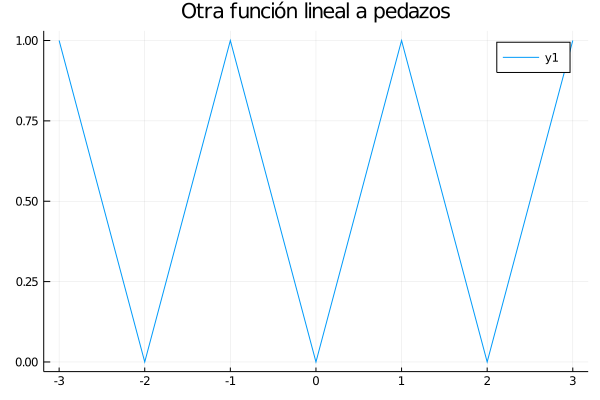

In [18]:
function triangular(x)
    aux = mod(x,2)
    if aux <= 1
        return aux
    elseif aux > 1
        return 2-aux
    end
end
xs = range(-3,stop=3,length=61)
ys = [triangular(x) for x in xs]
plot(xs,ys,title="Otra función lineal a pedazos")

Para construir la función $f$, la manera más sencilla y general es construirla a partir de un conjunto de funciones **base** $\{f_{i}\}_{i=1}^{N}$

### Ejercicio 3

Encuentra la expresión analítica de la función lineal a pedazos $f_i$ que cumple la siguiente propiedad:

$$
f_i(x_j) = \begin{cases}
1 & \text{si } j=i \\
0 & \text{si } j\neq i \\
\end{cases}
$$

**Sugerencia**: $f_i(x)$ debe de estar definida a pedazos

### Ejercicio 4

Define una funcion `baseLineal(xs,i,x)` que tome como argumento un arreglo ordenado `xs` de los $N$ valores $x_j$ de los puntos a interpolar, un índice `i` entre 1 y $N$ y un número `x`, y que regrese el valor de la función $f_i(x)$.

**Sugerencia** nota que debes de tratar de manera especial los casos $i=1$ e $i=N$

A partir de esas funciones, podemos entonces definir la interpolación lineal a pedazos $f$ como:

$$
f(x) = \sum_{i=1}^N y_i f_i(x)
$$

Claramente, ya que $f_i(x_j) = \delta_{ij}$ (delta de Kronecker), esta función cumple que $f(x_j) = y_j$

### Ejercicio 5

Define una función `interpolLineal(xs,ys)` que tome como argumento un arreglo `xs` de los valores $x_i$ y otro `ys` de los valores $y_i$ a interpolar y que regrese *la función* $f(x)$.

### Ejercicio 6.1

Genera pares $(x_i,y_i)$ que correspondan a las siguientes funciones:

* $\sin{x}$ en el intervalo $[-2\pi,2\pi]$

* $e^{-(x/4)^2} \cos{(5x)}$ en el intervalo $[-3,3]$

Utiliza la función del ejercicio anterior para obtener la interpolación lineal a pedazos. Muestra, en una sola figura, la función original, la interpolada y los puntos de interpolación.

### Ejercicio 6.2

Definimos ahora la **norma entre funciones** 

$$
\Vert f - g \Vert_{\infty} = \text{sup}_{x \in [a,b]} \{ |f(x) - g(x)| \}
$$

Define el error de la interpolación como la norma entre la función original y la interpolación. Analiza como cambia el error como función de $N$

**Sugerencia 1:** No se puede calcular exactamente la norma, por lo que hay que aproximarla.

**Sugerencia 2:** la función `maximum(A)` calcula el valor máximo de un arreglo de números `A`

In [19]:
println(maximum([3,1,4,0,19]))

19


### Ejercicio 7

Sin utilizar las funciones base, usando simplemente la definición, encuentra la forma explícita que debe tener la función interpolante $f$. Después, define una función `interpolLineal2(xs,ys)` que regrese el objeto de la función $f$ calculado a partir de la fórmula explícita.

**Sugerencia:** recordar la ecuación de la recta que pasa por dos puntos.

## Interpolación polinomial (o de Lagrange)

Como se ve en los ejercicios anteriores, la interpolación lineal a pedazos no es la mejor. Conviene, en lugar de utilizar una función lineal a pedazos, utilizar un polinomio. Para eso, debemos construir una nueva base $g_i$ de polinomios de grado $N-1$ que cumplan la propiedad deseada:

$$
g_i(x_j) = \begin{cases}
1 & \text{si } j=i \\
0 & \text{si } j\neq i \\
\end{cases}
$$

### Ejercicio 8:

Encuentra la expresión explícita de los polinomios $g_i(x)$ 

**Sugerencia:** Recuerda que $g_i$ es de grado $N-1$. Piensa: ¿Para qué se factoriza un polinomio?

Nuevamente, ya que conozcamos esta base, la interpolación polinomial $g(x)$ queda definida de la siguiente forma:

$$
g(x) = \sum_{i=1}^N y_i g_i(x)
$$

Nuvamente, la función $g$ cumplirá que $g(x_i) = y_i$

### Ejercicio 9.1

Construye una función `basePolinomial(xs,i,x)` que tome como argumento un arreglo `xs` de los valores $x_i$, un indice $i$ entre 1 y $N$ y un número $x$ y regrese el valor $g_i(x)$

### Ejercicio 9.2

Define una función `interpolPoli(xs,ys)` que tome como argumento un arreglo `xs` de los valores $x_i$ y otro `ys` de los valores $y_i$ a interpolar y que regrese *la función* correspondiente a la interpolación polinomial $g(x)$.



### Ejercicio 10

Repite todos los procedimientos del los ejercicios 6.1 y 6.2 pero ahora utilizando la función `interpolPoli`. ¿El error en la interpolación es mejor o peor que con la interpolación lineal a pedazos?

### Ejercicio 11 

Define una función `pol` que regrese el valor de un polinomio de grado $N-1$ y usa $N$ valores de $x$ **uniformemente espaciados** ($x_{i+1} - x_{i} = cte$) para generar los pares de $(x_i,y_i)$. Ahora utilizalos para generar la interpolación polinomial del polinomio. Grafica ambas funciones. ¿Qué observas? 

Investiga el **teorema de inteprolación de Lagrange**

## Estabilidad de la interpolación polinomial

Resulta que, en la práctica del día a día, la interpolación polinomial puede ser **inestable**. Para observar esto, puedes graficar la función original y su interpolación en un intervalo más grande $I \supset [x_0,x_N]$, que contenga al usado para interpolar.

En particular, cuando los puntos $x_i$ estan uniformemente espaciados, la interpolación puede tener un error muy grande

### Ejercicio 12

Definimos la función de Runge como

$$
R(x) = \frac{1}{1+x^2}
$$

Toma una partición regular del intervalo $[-1,1]$ con $N$ puntos y utilizalos para generar los pares $(x_i,y_i)$. Haz la interpolación polinomial de la función y gráficala junto la función de Runge . ¿Qué observas? Hazlo para varios valores de $N$.

En general, conviene tomar puntos separados no uniformemente para interpolar la función.

### Ejercicio 13

Definimos los nodos de Chebyshev $x_i$, para todo $0 \leq i \leq N$, como

$$
x_i = \cos{\left(\frac{2i-1}{2N}\pi\right)}
$$

Crea una interpolación polinomial para la función de Runge utilizando  $N$ nodos de Chebyshev. Hagan la gráfica de la interpolación y la función original. ¿La interpolación mejora?

## La visión general

Manipular funciones como objeto es algo que no se puede hacer en lenguajes de nivel más bajo. En esos lenguajes, las funciones generalmente se tratan como objetos especiales, no se pueden tratar igual que un número o un caracter. Python, por ser de alto nivel, también permite manipular así a las funciones.

Cuando les enseñe a graficar funciones, observaron que `plot` une los puntos por una recta. Así, `plot` grafica la interpolación lineal a pedazos de los puntos que le damos. Cuando tomamos muchos puntos, esa interpolación se parece mucho a la curva de la función original.

Este es uno de los ejemplos más sencillos de qué tan útil es la interpolación.

La interpolación polinomial o de Lagrange es poco usada por ser inestable. En general, conforme tomamos más puntos se vuelve todavía más inestable en ciertos intervalos. Las interpolaciones que se utilizan en aplicaciones reales, no solo buscan que la función coincida con los puntos, si no que se pide también dar valores para la derivada de la función interpolante en los puntos a interpolar.

Lás funciones más usadas para eso, y que también buscan coincidir en la segunda derivada, son funciones cúbicas a pedazos (*cubic spline*). Es decir, funciones que en cada subintervalo $[x_i,x_{i+1}]$ son un polinomio cúbico